In [1]:
import pynucastro as pyna
from pynucastro.networks import StarKillerNetwork

library_file = "20180319default2"
mylibrary = pyna.rates.Library(library_file)

data_list = mylibrary.get_rates()

all_nuclei = ["p","he4","ne20","o20","f20","mg24","al27","o16","si28","s32","p31"]

escn_library = mylibrary.linking_nuclei(all_nuclei,with_reverse=True)
escn_tabular = ["f20--o20-toki","ne20--f20-toki","o20--f20-toki","f20--ne20-toki"]

In [2]:
#rc = pyna.RateCollection(libraries=[escn_library],rate_files=escn_tabular)
rc = pyna.RateCollection(libraries=[escn_library])

comp = pyna.Composition(rc.get_nuclei())
comp.set_nuc("o16", 0.5)
comp.set_nuc("ne20", 0.3)
comp.set_nuc("mg24", 0.1)
comp.set_nuc("o20", 1.e-5)
comp.set_nuc("f20", 1.e-5)
comp.set_nuc("p", 1.e-5)
comp.set_nuc("he4", 1.e-2)
comp.set_nuc("al27", 1.e-2)
comp.set_nuc("si28", 1.e-2)
comp.set_nuc("s32", 1.e-2)
comp.set_nuc("p31", 1.e-2)
comp.normalize()

/home/zingale/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/zingale/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:569: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/zingale/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):
/home/zingale/.local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size

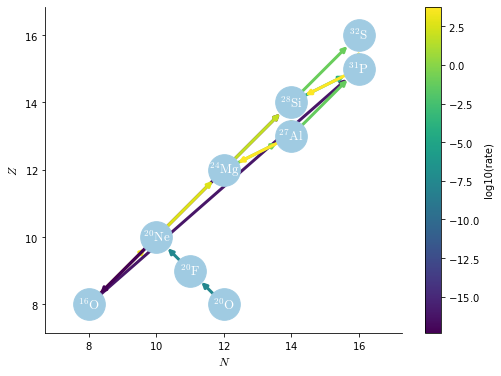

In [3]:
rc.plot(outfile="ecsn.png", rho=7.e9, T=1.e9, comp=comp, rate_value=1.e-20)

In [4]:
new_rate_list = []
ydots = rc.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)
for rate in rc.rates:
    if ydots[rate] >= 1.e-20 and rate.weak == False:
        new_rate_list.append(rate)

        
rc_new = pyna.RateCollection(rates=new_rate_list, rate_files=escn_tabular)

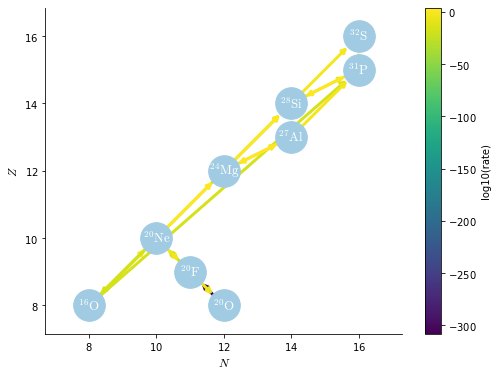

In [5]:
rc_new.plot(outfile="ecsn.png", rho=7.e9, T=1.e9, comp=comp)

In [6]:
rc_new.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 4.631669519815501e-18),
             (o16 + he4 --> ne20, 2163.4896055892013),
             (ne20 + he4 --> mg24, 470.4657166295948),
             (mg24 + he4 --> si28, 65.33425925449087),
             (al27 + p --> si28, 3786.5889540808494),
             (al27 + he4 --> p31, 0.057635811259143355),
             (si28 + he4 --> s32, 0.08322738610569617),
             (p31 + p --> s32, 2375.130496403913),
             (o16 + o16 --> p + p31, 7.154939895463953e-17),
             (o16 + o16 --> he4 + si28, 2.5949312230335836e-17),
             (mg24 + he4 --> p + al27, 0.2543862399303774),
             (al27 + p --> he4 + mg24, 5920.818449985262),
             (si28 + he4 --> p + p31, 0.00019528201299493395),
             (p31 + p --> he4 + si28, 5491.96044267561),
             (f20 --> o20, 6.765696872730337e-08),
             (ne20 --> f20, 0.00046418797301137863),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 8.45926444428071e-22)])

In [7]:
rc.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)

OrderedDict([(o20 --> f20, 2.702249897457067e-08),
             (f20 --> ne20, 3.286505102773197e-08),
             (ne20 --> he4 + o16, 4.631669519815501e-18),
             (mg24 --> he4 + ne20, 4.744790037605823e-42),
             (si28 --> p + al27, 2.2702059658516468e-49),
             (si28 --> he4 + mg24, 9.17815550598163e-47),
             (p31 --> he4 + al27, 9.75972961036992e-47),
             (s32 --> p + p31, 2.504262075058157e-36),
             (s32 --> he4 + si28, 2.4655741369058092e-33),
             (o16 + he4 --> ne20, 2163.4896055892013),
             (ne20 + he4 --> mg24, 470.4657166295948),
             (mg24 + he4 --> si28, 65.33425925449087),
             (al27 + p --> si28, 3786.5889540808494),
             (al27 + he4 --> p31, 0.057635811259143355),
             (si28 + he4 --> s32, 0.08322738610569617),
             (p31 + p --> s32, 2375.130496403913),
             (o16 + o16 --> p + p31, 7.154939895463953e-17),
             (o16 + o16 --> he4 + si28, 2.5949312

In [8]:
wd_net = StarKillerNetwork(rates=new_rate_list, rate_files=escn_tabular)

In [9]:
wd_net.rates

[ne20 --> he4 + o16,
 o16 + he4 --> ne20,
 ne20 + he4 --> mg24,
 mg24 + he4 --> si28,
 al27 + p --> si28,
 al27 + he4 --> p31,
 si28 + he4 --> s32,
 p31 + p --> s32,
 o16 + o16 --> p + p31,
 o16 + o16 --> he4 + si28,
 mg24 + he4 --> p + al27,
 al27 + p --> he4 + mg24,
 si28 + he4 --> p + p31,
 p31 + p --> he4 + si28,
 f20 --> o20,
 ne20 --> f20,
 o20 --> f20,
 f20 --> ne20]

In [10]:
len(wd_net.rates)

18

In [11]:
len(rc_new.rates)

18

In [12]:
wd_net.write_network(use_cse=True)

/home/zingale/development/pynucastro/pynucastro/rates/rate.py:1224: RuntimeWarning: divide by zero encountered in log10
  pivot_table[row_pos, col_pos] = np.log10(data_heatmap[:, 5])


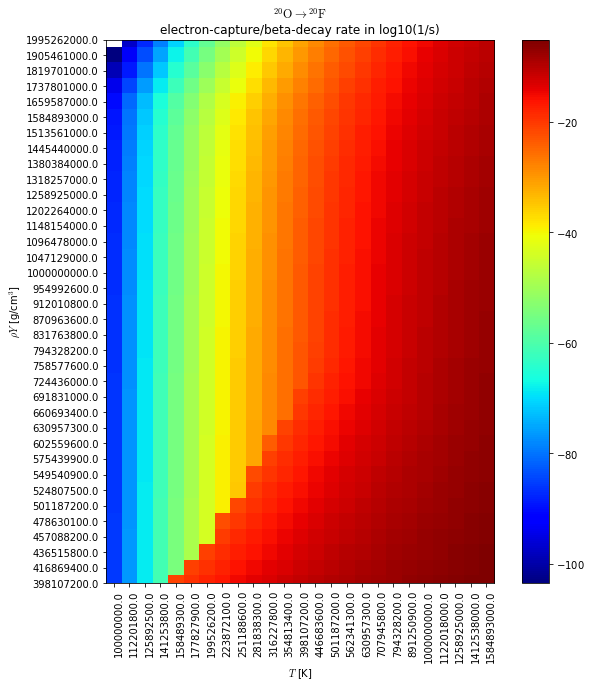

In [13]:
a = pyna.Rate("o20--f20-toki")
a.plot()

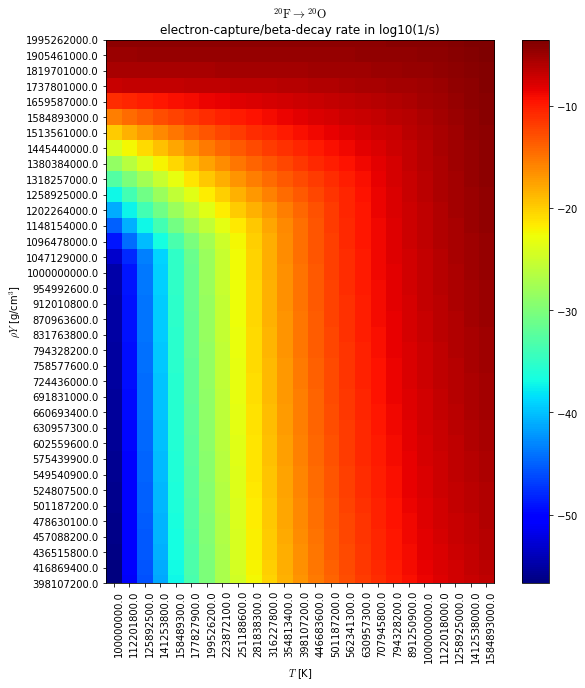

In [14]:
b = pyna.Rate("f20--o20-toki")
b.plot()

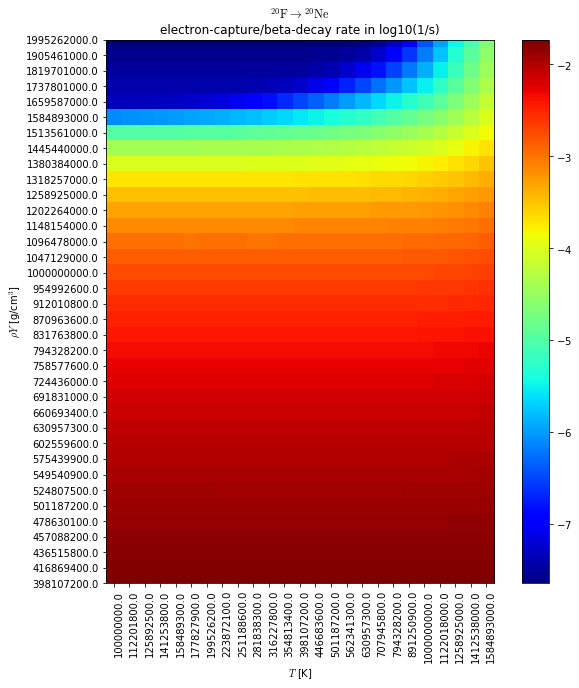

In [15]:
c = pyna.Rate("f20--ne20-toki")
c.plot()

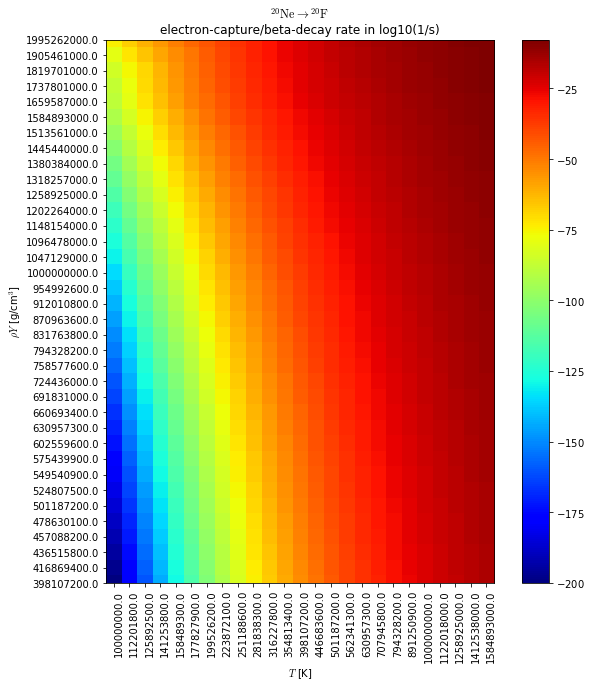

In [16]:
d = pyna.Rate("ne20--f20-toki")
d.plot()

both below are Hnuc = -4.168105e+08

In [17]:
rc_new.evaluate_rates(rho=8.195386e9, T=7.335519e8, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 1.6842598707771944e-28),
             (o16 + he4 --> ne20, 66.77040184484257),
             (ne20 + he4 --> mg24, 15.312373679403816),
             (mg24 + he4 --> si28, 0.5534485304776637),
             (al27 + p --> si28, 810.601403358853),
             (al27 + he4 --> p31, 0.0002832049770155471),
             (si28 + he4 --> s32, 0.00034147631570186364),
             (p31 + p --> s32, 590.4241697923229),
             (o16 + o16 --> p + p31, 5.1256465605484603e-23),
             (o16 + o16 --> he4 + si28, 1.835316579676856e-23),
             (mg24 + he4 --> p + al27, 3.4257774674065294e-05),
             (al27 + p --> he4 + mg24, 679.9660391799652),
             (si28 + he4 --> p + p31, 6.308335891937911e-09),
             (p31 + p --> he4 + si28, 570.822525017429),
             (f20 --> o20, 1.2967690493984404e-07),
             (ne20 --> f20, 0.002077753334105239),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 1.1379751165752664e-30)

In [18]:
rc_new.evaluate_rates(rho=8.191856e9, T=7.345557e8, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 1.9047050909790568e-28),
             (o16 + he4 --> ne20, 68.0014126258263),
             (ne20 + he4 --> mg24, 15.557737861645995),
             (mg24 + he4 --> si28, 0.567108609335868),
             (al27 + p --> si28, 816.749613740848),
             (al27 + he4 --> p31, 0.000290485361368095),
             (si28 + he4 --> s32, 0.0003506489931024651),
             (p31 + p --> s32, 594.7529274983931),
             (o16 + o16 --> p + p31, 5.476854877055254e-23),
             (o16 + o16 --> he4 + si28, 1.9612579474669584e-23),
             (mg24 + he4 --> p + al27, 3.5788343827167845e-05),
             (al27 + p --> he4 + mg24, 686.1800526465984),
             (si28 + he4 --> p + p31, 6.6476131976080014e-09),
             (p31 + p --> he4 + si28, 577.1157216991564),
             (f20 --> o20, 1.2967690493984404e-07),
             (ne20 --> f20, 0.002077753334105239),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 1.1379751165752664e-30)])

one of below is Hnuc = -4.168105e+08. one of below is Hnuc = 0

In [19]:
rc_new.evaluate_rates(rho=8.157834e9, T=7.490500e8, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 1.0847764294909268e-27),
             (o16 + he4 --> ne20, 88.21701314692555),
             (ne20 + he4 --> mg24, 19.539216250843165),
             (mg24 + he4 --> si28, 0.802644049363288),
             (al27 + p --> si28, 911.2347668377429),
             (al27 + he4 --> p31, 0.0004176324640321217),
             (si28 + he4 --> s32, 0.0005121468508271703),
             (p31 + p --> s32, 660.8722159197771),
             (o16 + o16 --> p + p31, 1.4097127298059696e-22),
             (o16 + o16 --> he4 + si28, 5.0548675788927223e-23),
             (mg24 + he4 --> p + al27, 6.670019413578802e-05),
             (al27 + p --> he4 + mg24, 783.9113367509618),
             (si28 + he4 --> p + p31, 1.3983677855620782e-08),
             (p31 + p --> he4 + si28, 675.8342252856056),
             (f20 --> o20, 1.2967690493984404e-07),
             (ne20 --> f20, 0.002077753334105239),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 1.1379751165752664e-30

In [20]:
rc_new.evaluate_rates(rho=8.153618e9, T=7.508423e8, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 1.338919322859823e-27),
             (o16 + he4 --> ne20, 91.03763865681962),
             (ne20 + he4 --> mg24, 20.088157552900466),
             (mg24 + he4 --> si28, 0.8371474373684797),
             (al27 + p --> si28, 923.451432458204),
             (al27 + he4 --> p31, 0.000436500130118566),
             (si28 + he4 --> s32, 0.0005362976438940197),
             (p31 + p --> s32, 669.3610901924355),
             (o16 + o16 --> p + p31, 1.581793439433802e-22),
             (o16 + o16 --> he4 + si28, 5.672803202328748e-23),
             (mg24 + he4 --> p + al27, 7.194185873457018e-05),
             (al27 + p --> he4 + mg24, 796.9073686262947),
             (si28 + he4 --> p + p31, 1.5301589850373862e-08),
             (p31 + p --> he4 + si28, 688.9414880134797),
             (f20 --> o20, 1.2967690493984404e-07),
             (ne20 --> f20, 0.002077753334105239),
             (o20 --> f20, 0.0),
             (f20 --> ne20, 1.1379751165752664e-30)])